### IsomiR's expression (corr) 
* **Задача**: сравнить, схожи ли выдаваемые результаты секвенирования с уже определенными изоформами, с результатами Isomirmap

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import scipy.stats as sps

In [194]:
def path(name, type_):
    return "~ksuma/isomirs/" + name + "_isomir/output-IsoMiRmap_v5-"+type_+"-isomiRs.expression.txt"

def get_table(name, type_, dig):
    ''' Reading the file '''
    df = pd.read_fwf(path(name, type_), delimiter = '/t')
    df = df['## Table of '+type_+'-isomiRs.'].str.split('\t', expand = True)
    df.columns = df.loc[dig]
    
    ''' Deleting tandem repeats (in case of exclusive it is not neccessary)'''
    df = df.where(df[df.columns[-1]] == '').dropna()
    df = df.rename(columns = {df.columns[-1] :'Repeated'})
    df = df.rename(columns = {'Mature meta-data (bracket delimited per hairpin)' :'Mature'})
    
    df.index = 1 + np.arange(0, len(df))
    df['RPM '+name] = pd.to_numeric(df['RPM**'])
    return df[['License Plate', 'IsomiR sequence', 'RPM ' + name, 
               'Mature']]

def get_type(name, table, typ):
    table[name+' type'] = [typ if table['RPM '+name].loc[i] else 0 for i in range(table.shape[0])]
    return table

In [195]:
isomir = pd.read_csv('isomiR_CPM.tsv', sep = '\t', index_col = 0)
isomir

,ELOVL5,IGFBP6,LUC
hsa-let-7a-2-3p|0|+1,1.804214,1.882774,1.808399
hsa-let-7a-2-3p|0|-1,3.083581,3.989726,2.334155
hsa-let-7a-2-3p|0|0,5.884886,6.697078,5.684698
hsa-let-7a-3p|+1|+2,2.982217,3.042027,2.760237
hsa-let-7a-3p|0|+1,4.573795,4.352978,4.312175
...,...,...,...
hsa-miR-99b-5p|0|-1,11.029422,10.333528,11.391981
hsa-miR-99b-5p|0|-2,7.970474,7.151927,8.229535
hsa-miR-99b-5p|0|-3,4.292564,3.212610,3.948385
hsa-miR-99b-5p|0|-4,3.295608,2.360401,3.088752


In [196]:
ELOV5 = get_table("ELOV5", "exclusive", 5)
IGFBP6 = get_table("IGFBP6", "exclusive", 5)
LUC = get_table("LUC", "exclusive", 5)

In [197]:
def mir(x):
    try:
        for i in x.split('], ['):
            i = i.strip('[]').split(', ')[0]
            i = re.sub(r'&offsets','', i)
            k = i.split('&')[1]
        return k
    except:
        pass

In [198]:
IGFBP6['Mature'] = IGFBP6['Mature'].apply(mir)
LUC['Mature'] = LUC['Mature'].apply(mir)
ELOV5['Mature'] = ELOV5['Mature'].apply(mir)

In [199]:
ELOV5.index = ELOV5['Mature']
ELOV5 = ELOV5.drop('Mature', axis = 1)

LUC.index = LUC['Mature']
LUC = LUC.drop('Mature', axis = 1)

IGFBP6.index = IGFBP6['Mature']
IGFBP6 = IGFBP6.drop('Mature', axis = 1)

isomir.insert(1, "ELOVL5_isomir", 0, True)
isomir.insert(3, "IGFBP6_isomir", 0, True)
isomir.insert(5, "LUC_isomir", 0, True)

In [200]:
for i in isomir.index:
    try:
        isomir.loc[i,'ELOVL5_isomir'] = np.sum(ELOV5.loc[i]['RPM ELOV5'])
        isomir.loc[i,'LUC_isomir'] = np.sum(LUC.loc[i]['RPM LUC'])
        isomir.loc[i,'IGFBP6_isomir'] = np.sum(IGFBP6.loc[i]['RPM IGFBP6'])

    except:
        isomir = isomir.drop(i, axis = 0)

In [201]:
isomir

,ELOVL5,ELOVL5_isomir,IGFBP6,IGFBP6_isomir,LUC,LUC_isomir
hsa-let-7a-2-3p|0|+1,1.804214,0.13,1.882774,0.41,1.808399,0.37
hsa-let-7a-2-3p|0|-1,3.083581,1.45,3.989726,1.84,2.334155,0.61
hsa-let-7a-2-3p|0|0,5.884886,9.62,6.697078,12.18,5.684698,7.55
hsa-let-7a-3p|+1|+2,2.982217,0.66,3.042027,0.88,2.760237,0.86
hsa-let-7a-3p|0|+1,4.573795,3.69,4.352978,2.35,4.312175,2.82
...,...,...,...,...,...,...
hsa-miR-99b-5p|0|-1,11.029422,322.72,10.333528,159.94,11.391981,402.25
hsa-miR-99b-5p|0|-2,7.970474,40.18,7.151927,17.70,8.229535,44.79
hsa-miR-99b-5p|0|-3,4.292564,3.16,3.212610,1.12,3.948385,2.16
hsa-miR-99b-5p|0|-4,3.295608,1.32,2.360401,0.65,3.088752,1.12


<AxesSubplot:title={'center':'Spearman Correlation'}>

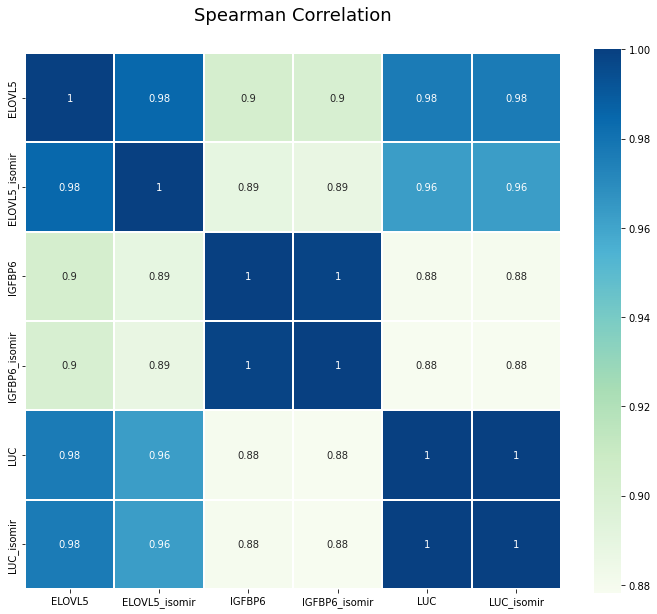

In [236]:
colormap = plt.cm.GnBu
plt.figure(figsize=(12,10))

plt.title('Spearman Correlation', y=1.05, size=18)
sns.heatmap(sps.spearmanr(isomir)[0],
            linewidths=0.1, vmax=1.0, 
            xticklabels = isomir.columns,
            yticklabels = isomir.columns,
            square=True, cmap=colormap, linecolor='white', annot=True)

Index(['ELOVL5', 'ELOVL5_isomir', 'IGFBP6', 'IGFBP6_isomir', 'LUC',
       'LUC_isomir'],
      dtype='object')